## Dummy Submission

In [144]:
from sklearn.model_selection import cross_val_score
cv_score = []

## Data Visualization

In [162]:
import pandas as pd
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
## selecting numerical features for plotting
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

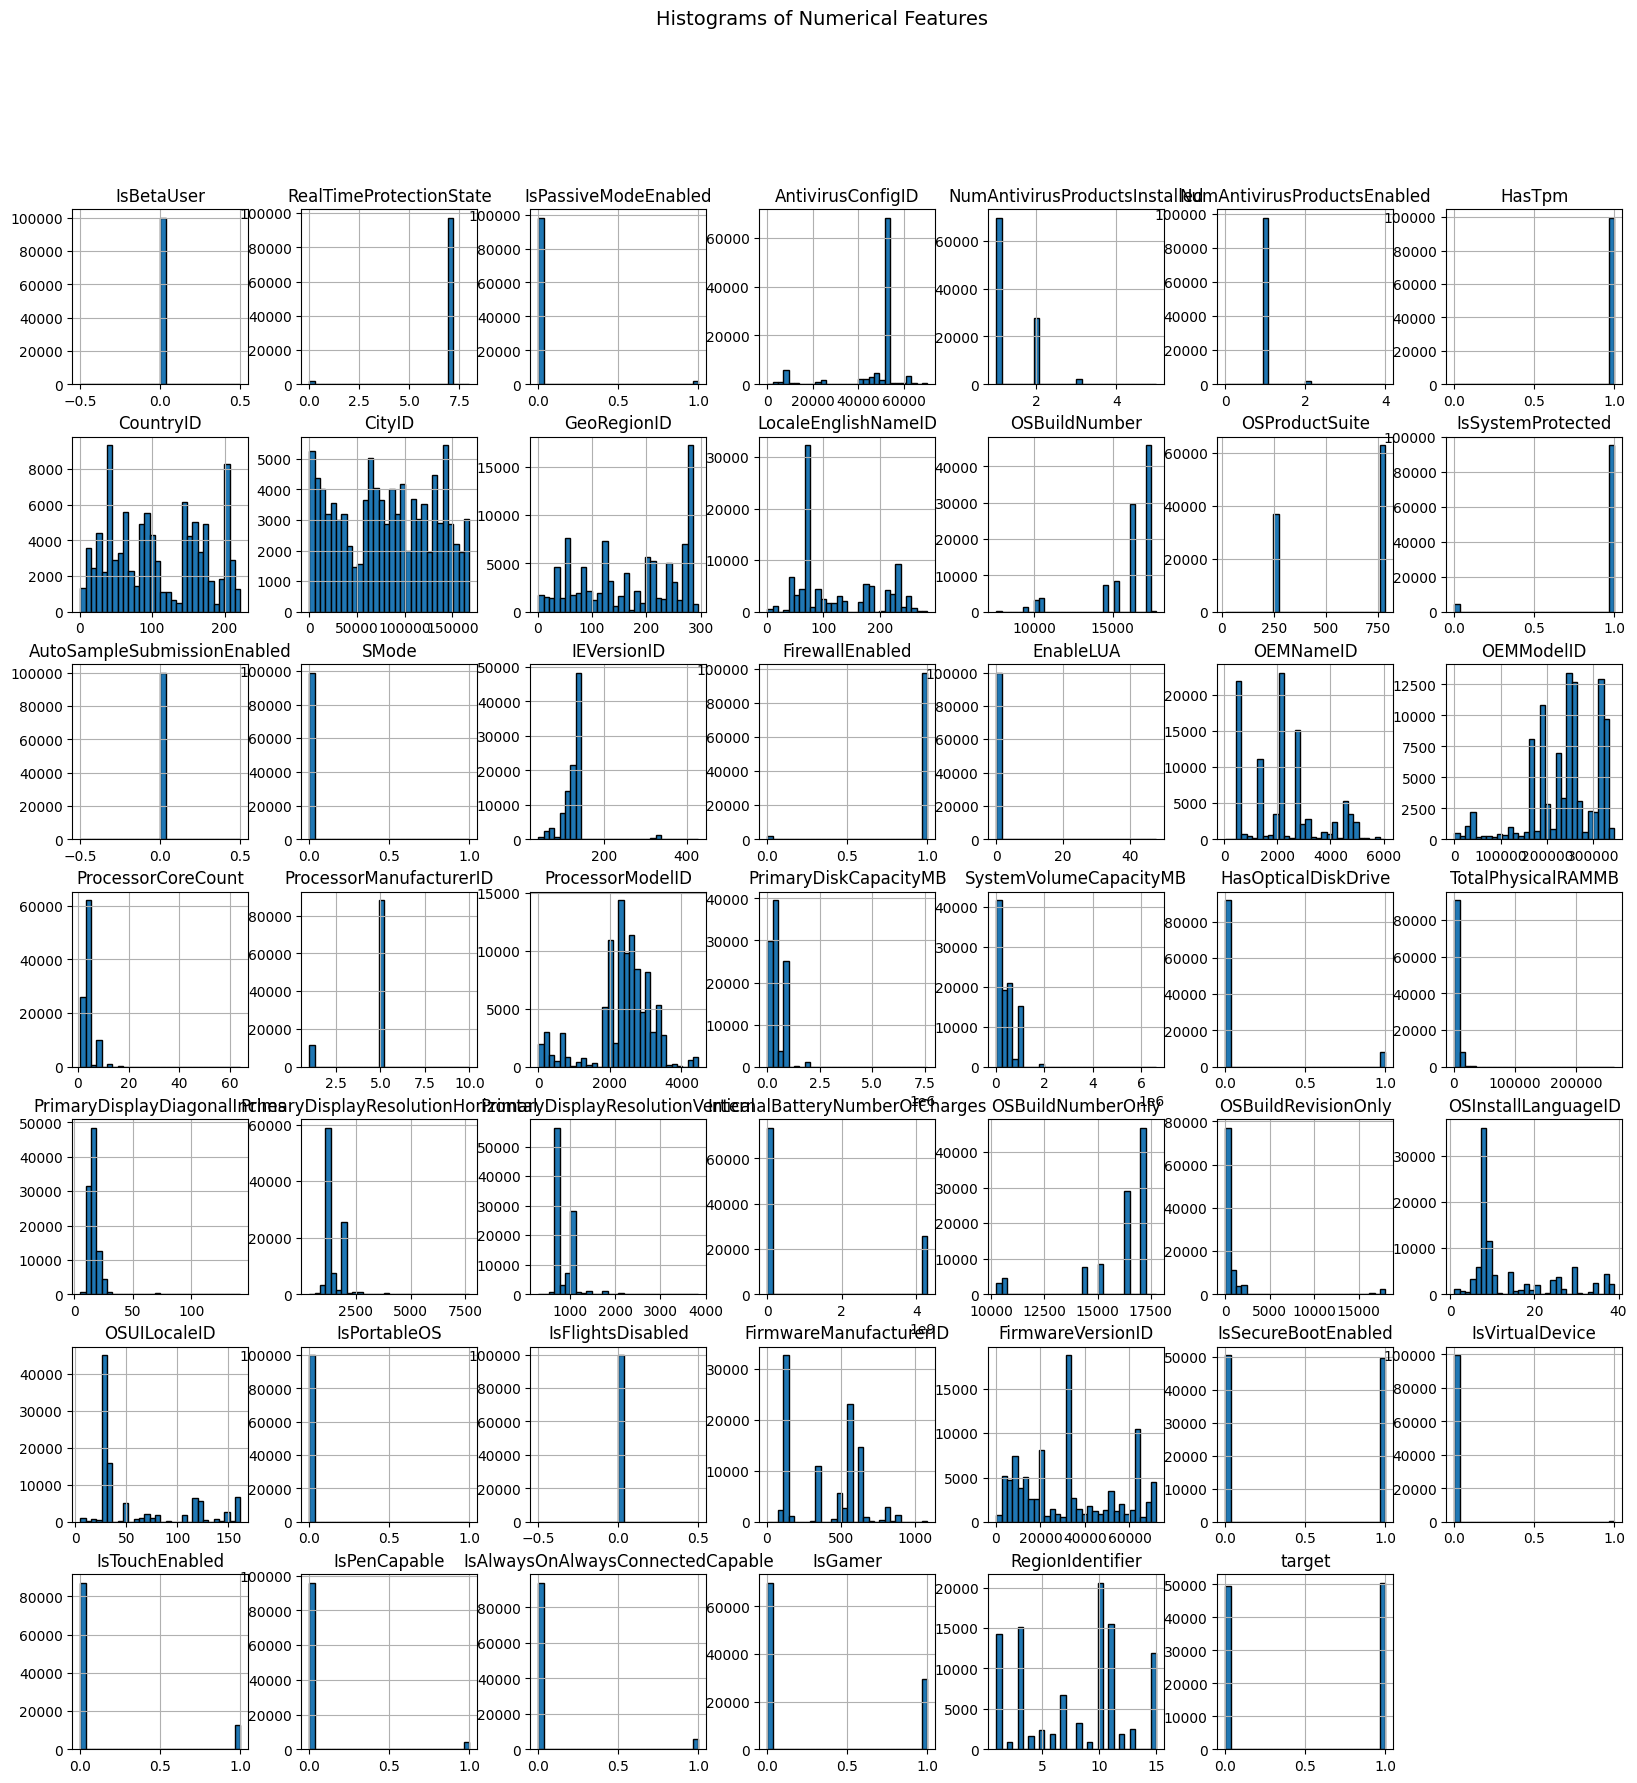

In [164]:
# Histogram of numerical features
df[numerical_features].hist(figsize=(20, 20), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()

#### Observations
Some features have only 1 value which means it has no variance and wont contribute much to the model.Some are right skewed and some are left

<Figure size 1400x800 with 0 Axes>

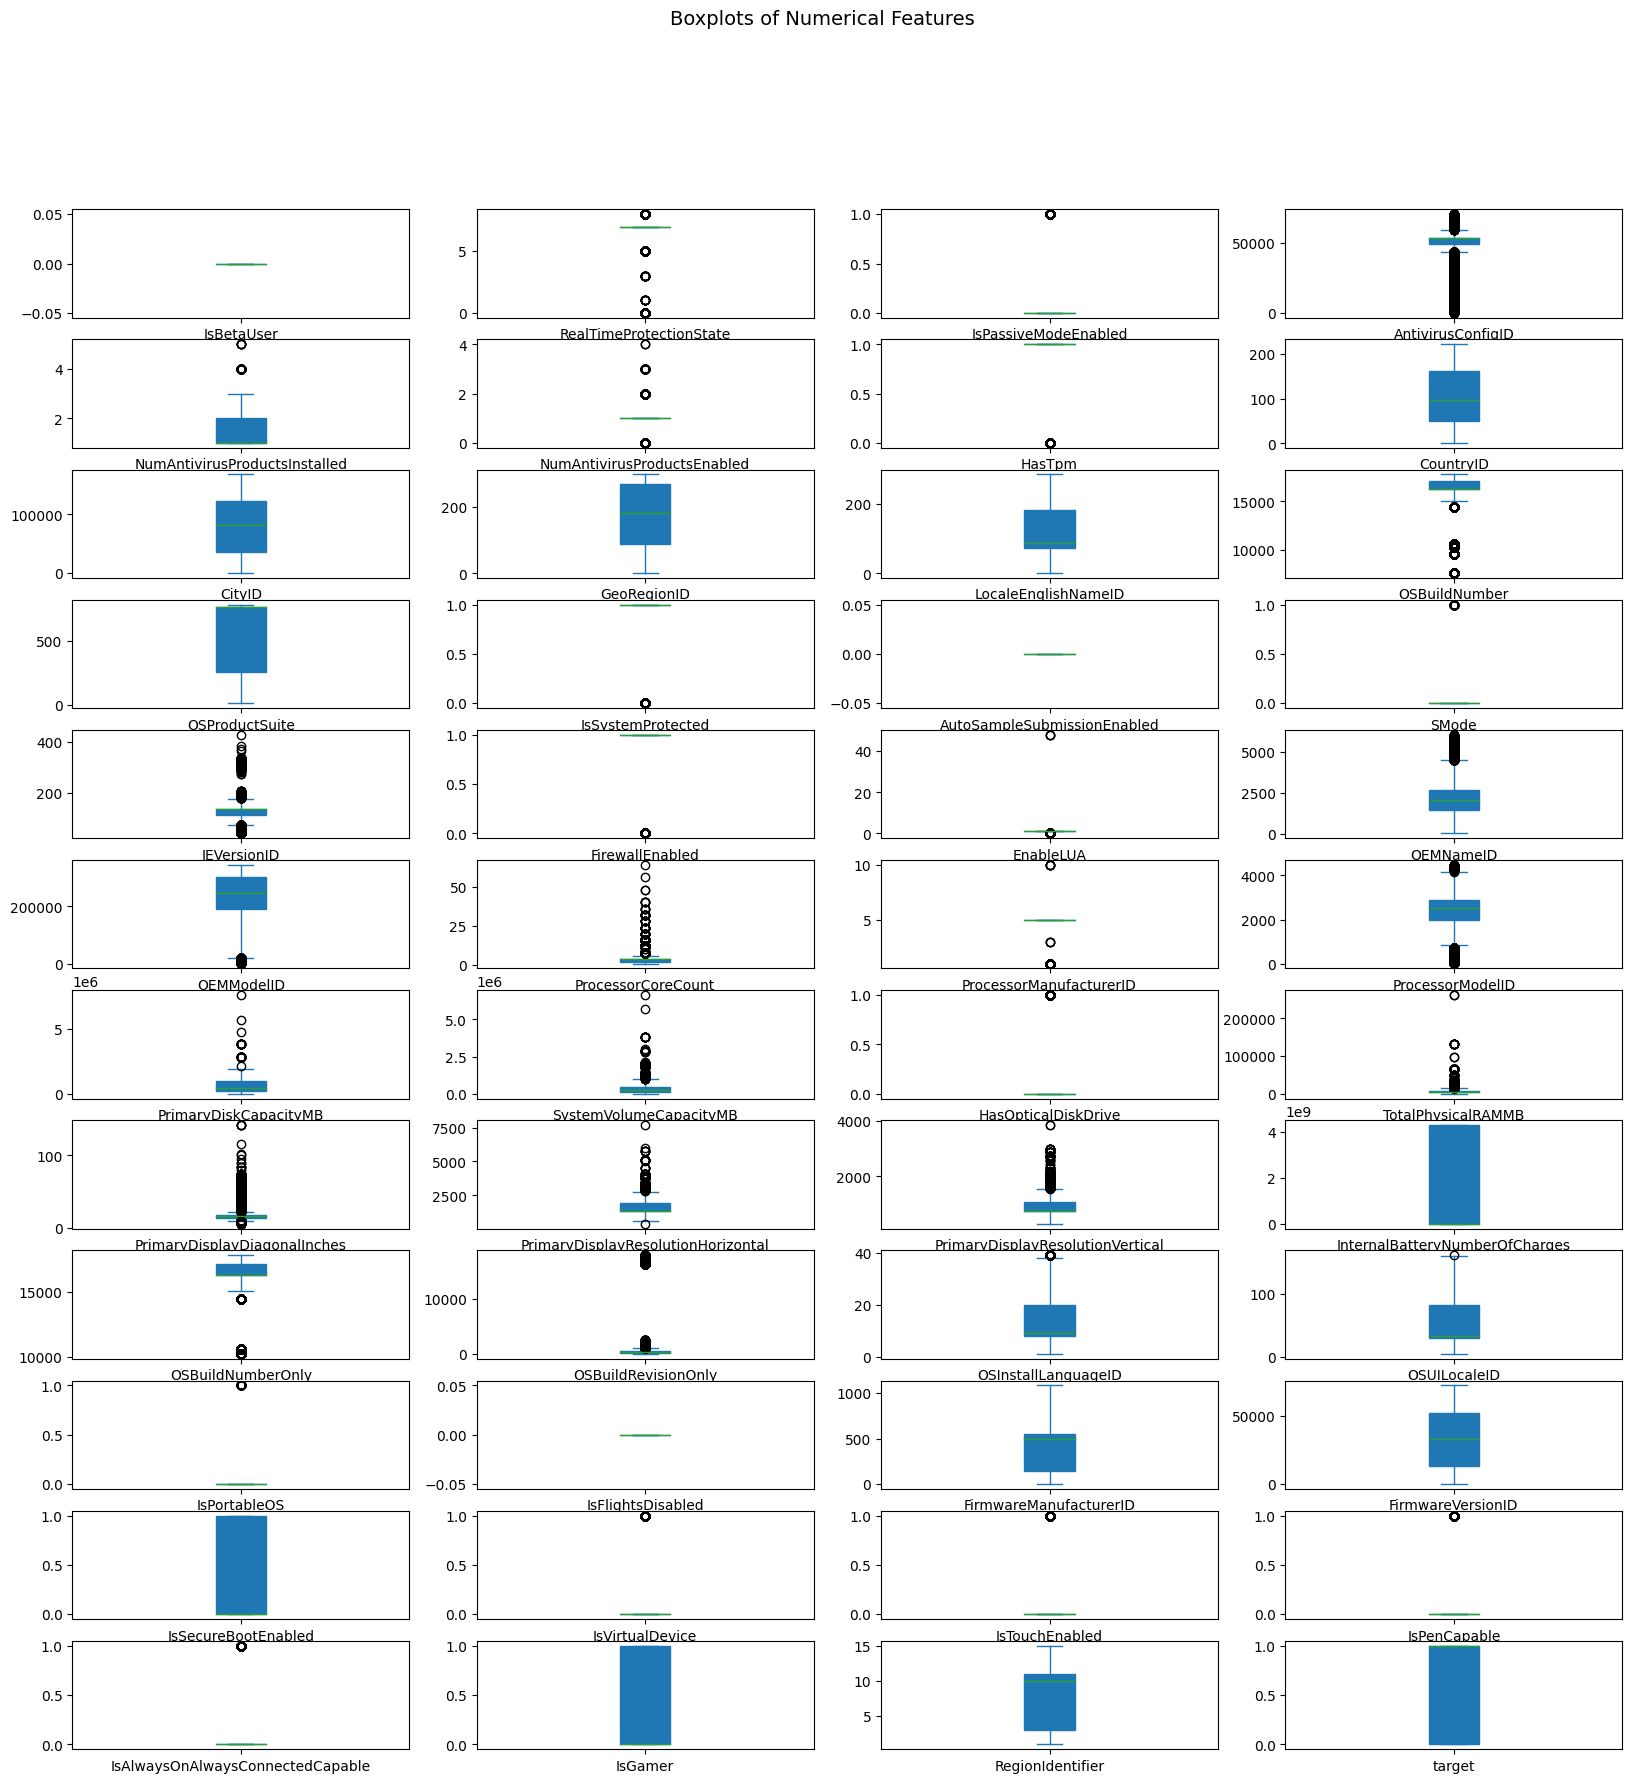

In [165]:
# Boxplots for numerical features (to detect outliers)

num_features = len(numerical_features)

ncols = 4  

nrows = (num_features // ncols) + (num_features % ncols != 0)

plt.figure(figsize=(14, 8))
df[numerical_features].plot(kind='box', subplots=True, layout=(nrows, ncols), figsize=(20, 20), patch_artist=True)
plt.suptitle("Boxplots of Numerical Features", fontsize=14)
plt.show()


### Observations
* Many features like isBetaUser , IsSystemProtected are a straight line which means they are constants.This was also observed in bar graph
* NumAntivirusProductsInstalled, SystemVolumeCapacityMB, TotalPhysicalRAMMB, InternalBatteryNumberOfCharges have lot of outliers
* ProcessorCoreCount, PrimaryDiskCapacityMB, PrimaryDisplayResolutionVertical are highly skewed

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


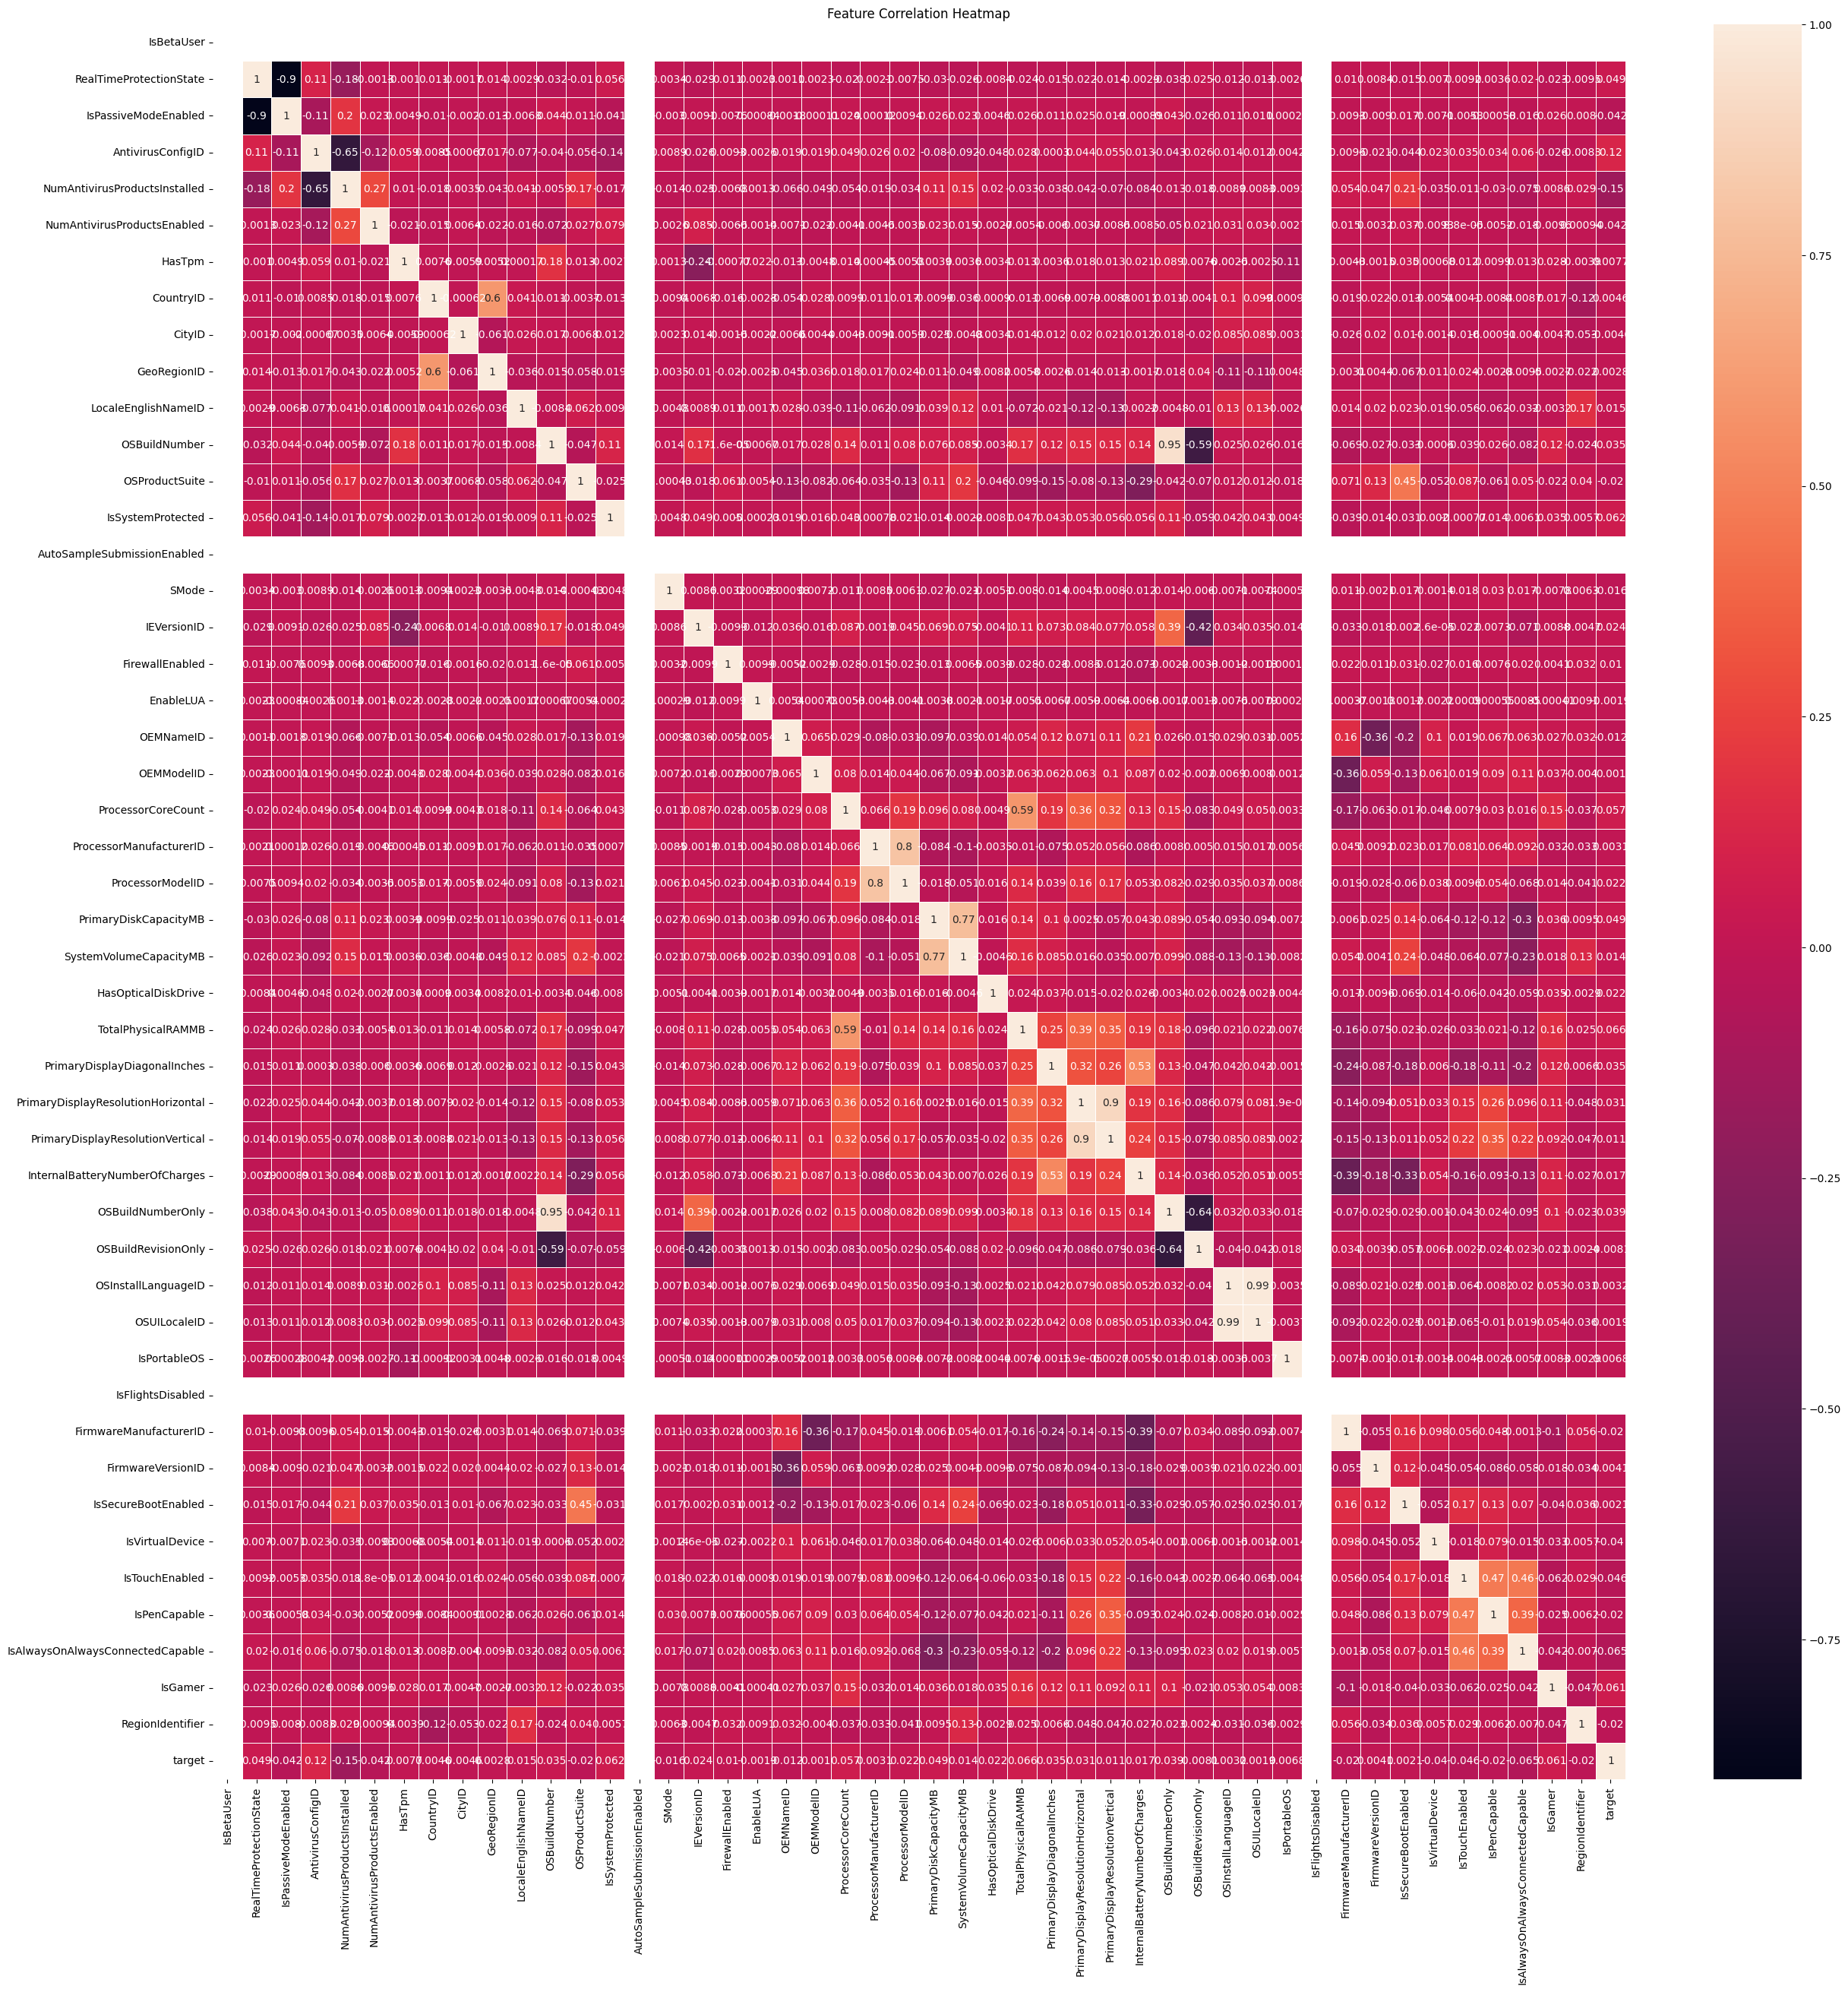

In [166]:
# correlation matrix
corr_matrix = df[numerical_features].corr()

# heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


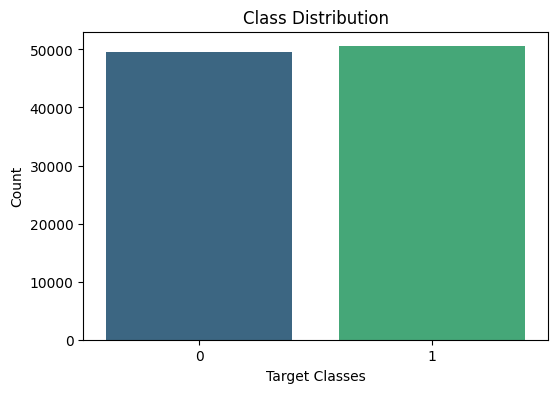

In [167]:
#Checking Class Distribution (Bar Plot)
plt.figure(figsize=(6, 4))
sns.countplot(x=df['target'], palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()

Target classes are almost same. This shows that the dataset is balanced

## Training a Logistic Regression Model and selecting best hyperparameters using grid-search cv and dropping categorical columns

In [168]:
X.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,13224.0,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11


In [169]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

df_clean = df.drop(columns=["MachineID", "DateAS", "DateOS"], errors="ignore")

X = df_clean.drop(columns=["target"])

numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
X = X[numeric_cols]  

y = df_clean["target"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), 
    ("scaler", StandardScaler())  
])

pipeline = Pipeline([
    ("preprocessor", num_pipeline),
    ("classifier", LogisticRegression(max_iter=500))  
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10], 
    "classifier__solver": ["liblinear", "lbfgs"]  
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Cross-Validation Accuracy: 0.5936250000000001


## Submitting Logistic regression model

In [170]:
X_train.shape

(80000, 47)

In [171]:
X_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

In [172]:
X_test = X_test[numeric_cols]

In [173]:
X_test.shape

(10000, 47)

In [174]:
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [175]:
y_pred.shape

(10000,)

In [176]:
submission = pd.DataFrame({"id":range(0,X_test.shape[0]),"target":y_pred})

In [177]:
submission.shape

(10000, 2)

In [178]:
submission.head()

,id,target
0,0,1
1,1,0
2,2,0
3,3,1
4,4,0


In [179]:
submission.to_csv('submission.csv',index = False)

## Logistic Regression main

In [180]:
import pandas as pd
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [181]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

df_clean = df.drop(columns=["MachineID", "DateAS", "DateOS"], errors="ignore")
##These columns are not useful for learning patterns hence removed

X = df_clean.drop(columns=["target"])

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
X = X[num_cols]  

y = df_clean["target"]

##Missing values are imputed with median and then scaled with standard scalar
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), 
    ("scaler", StandardScaler())  
])

pipeline = Pipeline([
    ("preprocessor", num_pipeline),
    ("classifier", LogisticRegression(max_iter=500))  
])

#for grid search
param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10], 
    "classifier__solver": ["liblinear", "lbfgs"]  
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X, y)

print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Cross-Validation Accuracy: 0.59288


In [182]:
X_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")
X_test = X_test[num_cols]
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [183]:
submission = pd.DataFrame({"id":range(0,X_test.shape[0]),"target":y_pred})
submission.head()

,id,target
0,0,1
1,1,0
2,2,0
3,3,1
4,4,0


In [184]:
submission.to_csv('submission.csv',index = False)

In [185]:
cv_score.append(cross_val_score(grid_search,X,y,cv=3))

## Logistic Regression using categorical data with encoding

In [186]:
# import pandas as pd
# df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
# df.head()

In [187]:
# X_train = df.drop(columns = ['target'])
# y_train = df['target']

In [188]:
# X_train.head()

In [189]:
# X_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

In [190]:
# X_test.head()

In [191]:
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.feature_selection import VarianceThreshold
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.compose import ColumnTransformer

In [192]:
# categorical_columns = X_train.select_dtypes(include=['object']).columns
# numerical_columns = X_train.select_dtypes(exclude=['object']).columns

In [193]:
# preprocessor = ColumnTransformer([
#         ('num', Pipeline([
#             ('imputer', SimpleImputer(strategy='mean')),  
#             ('variance_threshold', VarianceThreshold(threshold=0.01)) 
#         ]), numerical_columns),
#         ('cat', Pipeline([
#             ('imputer', SimpleImputer(strategy='most_frequent')),  
#             ('onehot', OneHotEncoder(handle_unknown='ignore'))  
#         ]), categorical_columns)
# ])

In [194]:
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),  # Apply preprocessor
#     ('log_reg', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression model
# ])

In [195]:
# param_grid = {
#     'log_reg__C': [0.01, 0.1, 1, 10],
#     'log_reg__solver': ['lbfgs', 'liblinear'],
#     'log_reg__penalty': ['l2'],
#     'log_reg__max_iter': [100, 200, 300]
# }

# grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1)
# grid_search.fit(X_train, y_train)

In [196]:
# y_pred = grid_search.best_estimator_.predict(X_test)

In [197]:
# submission = pd.DataFrame({"id":range(0,X_test.shape[0]),"target":y_pred})

In [198]:
# submission.to_csv('submission.csv',index = False)

## Random Forest Classifier with Grid Search

In [199]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler , OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV

In [200]:
# X_train = df.drop(columns = ['target'])
# y_train = df['target']

In [201]:
# X_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

In [202]:
# categorical_cols = X_train.select_dtypes(include=['object']).columns #selecting categorical col
# numerical_cols = X_train.select_dtypes(exclude=['object']).columns #selecting numerical col

In [203]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', Pipeline([
#             ('imputer', SimpleImputer(strategy='mean')),
#             ('scaler', StandardScaler())                
#         ]), numerical_cols),
#         ('cat', Pipeline([
#             ('imputer', SimpleImputer(strategy='most_frequent')),
#             ('onehot', OneHotEncoder(handle_unknown='ignore'))   
#         ]), categorical_cols)
# ])  ##numerical cols and categorical cols processed with appropriate transformers

In [204]:
# rf_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
# ])

In [205]:
# param_grid = {
#     'classifier__n_estimators': [100, 200, 300],            
#     'classifier__max_depth': [None, 10, 20, 30],            
#     'classifier__min_samples_split': [2, 5, 10],            
#     'classifier__min_samples_leaf': [1, 2, 4],               
#     'classifier__max_features': ['sqrt', 'log2'],    
#     'classifier__class_weight': [None, 'balanced']           
# }

# grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

In [206]:
# grid_search.fit(X_train,y_train)

In [207]:
# y_pred = grid_search.best_estimator_.predict(X_test)

In [208]:
# submission = pd.DataFrame({"id":range(0,X_test.shape[0]),"target":y_pred})

In [209]:
# submission.to_csv('submission.csv',index = False)

## Random Forest Classifier Final

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [211]:
import pandas as pd
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
X_train = df.drop(columns = ["target"])
y_train = df["target"]
X_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

In [212]:
cat_features = X_train.select_dtypes(include=["object"]).columns ## selecting categorical cols
num_features = X_train.select_dtypes(exclude=["object"]).columns ## selecting numeical cols

In [213]:
##pipeline for categorical cols
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])
##pipeline for numerical cols
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean"))
])

In [214]:
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

In [215]:
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [216]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['IsBetaUser', 'RealTimeProtectionState', 'IsPassiveModeEnabled',
       'AntivirusConfigID', 'NumAntivirusProductsInstalled',
       'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID',
       'GeoRegionID', 'LocaleEnglishNameID', 'OSBuildNumber',...
       'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType', 'ChassisType',
       'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch',
       'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
       'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel',
       'FlightRing', 'DateAS', 'DateOS'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [217]:
y_pred = rf_pipeline.predict(X_test)

In [218]:
submission = pd.DataFrame({"id":range(0,X_test.shape[0]),"target":y_pred})

In [219]:
submission.to_csv('submission.csv',index = False)

In [220]:
cv_score.append(cross_val_score(rf_pipeline,X_train,y_train,cv=3))

## Trying a basic XGBoost Model

In [221]:
# import pandas as pd
# import xgboost as xgb

# df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")

# X_train = df.drop(columns = ["target"])
# X_train[X_train.select_dtypes('object').columns] = X_train.select_dtypes('object').astype('category')

# y_train = df["target"]

# X_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

# model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42 , enable_categorical = True)
# model.fit(X_train, y_train)
# X_test[X_test.select_dtypes('object').columns] = X_test.select_dtypes('object').astype('category')
# y_pred = model.predict(X_test)

In [222]:
# submission = pd.DataFrame({"id":range(0,X_test.shape[0]),"target":y_pred})
# submission.to_csv("/kaggle/working/submission.csv", index=False)

In [223]:
# submission.head()

## XGBoost Final model

In [224]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import FunctionTransformer

In [225]:
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
X_train = df.drop(columns = ["target"])
y_train = df["target"]
X_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

In [226]:
columns_to_drop = ['MachineID', 'DateAS', 'DateOS'] ##dont contribute in learning
X_train.drop(columns=columns_to_drop, inplace=True, errors='ignore')
X_test.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [227]:
num_cols = [
    'IsBetaUser', 'RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID',
    'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID', 'GeoRegionID',
    'LocaleEnglishNameID', 'OSBuildNumber', 'OSProductSuite', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
    'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount',
    'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB',
    'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
    'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges', 'OSBuildNumberOnly', 'OSBuildRevisionOnly',
    'OSInstallLanguageID', 'OSUILocaleID', 'IsPortableOS', 'IsFlightsDisabled', 'FirmwareManufacturerID',
    'FirmwareVersionID', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable',
    'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'RegionIdentifier'
] ## all numerical columns
cat_cols = [
    'ProductName', 'EngineVersion', 'AppVersion', 'SignatureVersion', 'PlatformType', 'Processor', 'OSVersion',
    'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName', 'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType',
    'ChassisType', 'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch', 'OSEdition',
    'OSSkuFriendlyName', 'OSInstallType', 'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel',
    'FlightRing'
] ## all categorical columns

In [228]:
## Bringing extreme values closer to normal values
def cap_outliers(X, factor=1.5):
    X_capped = X.copy()
    for col_idx in range(X.shape[1]): 
        col = X[:, col_idx]
        Q1 = np.quantile(col, 0.25)
        Q3 = np.quantile(col, 0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        X_capped[:, col_idx] = np.clip(col, lower_bound, upper_bound)
    return X_capped

In [229]:
## numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier_capper', FunctionTransformer(
        cap_outliers, 
        kw_args={'factor': 1.5}
    )),  
    ('scaler', MinMaxScaler())  
])

In [230]:
## categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OrdinalEncoder(
        handle_unknown='use_encoded_value',  
        unknown_value=-1  
    ))
])

In [231]:
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [232]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [233]:
class_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1]) ##ratio of majority to minority class
model = XGBClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=class_ratio,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)


In [234]:
model.fit(X_train_processed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [235]:
y_pred = model.predict(X_test_processed)

In [236]:
submission = pd.DataFrame({"id": range(len(y_pred)), "target": y_pred})
submission.to_csv("/kaggle/working/submission.csv", index=False)

In [237]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [238]:
submission = pd.DataFrame({"id":range(0,X_test.shape[0]),"target":y_pred})
submission.head()

,id,target
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0


In [239]:
submission.to_csv('submission.csv',index = False)

In [240]:
cv_score.append(cross_val_score(model,X_train_processed,y_train,cv=3))

## XGBOOST final (with variance threshold)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
X_train = df.drop(columns=["target"])
y_train = df["target"]
X_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

In [ ]:
# Drop unnecessary columns
columns_to_drop = ['MachineID', 'DateAS', 'DateOS']
X_train.drop(columns=columns_to_drop, inplace=True, errors='ignore')
X_test.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [262]:
# Define numerical and categorical columns
num_cols = [
    'IsBetaUser', 'RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID',
    'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID', 'GeoRegionID',
    'LocaleEnglishNameID', 'OSBuildNumber', 'OSProductSuite', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
    'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount',
    'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB',
    'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
    'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges', 'OSBuildNumberOnly', 'OSBuildRevisionOnly',
    'OSInstallLanguageID', 'OSUILocaleID', 'IsPortableOS', 'IsFlightsDisabled', 'FirmwareManufacturerID',
    'FirmwareVersionID', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable',
    'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'RegionIdentifier'
]

cat_cols = [
    'ProductName', 'EngineVersion', 'AppVersion', 'SignatureVersion', 'PlatformType', 'Processor', 'OSVersion',
    'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName', 'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType',
    'ChassisType', 'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch', 'OSEdition',
    'OSSkuFriendlyName', 'OSInstallType', 'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel',
    'FlightRing'
]

In [ ]:
## Bringing extreme outliers close to normal values
def cap_outliers(X, factor=1.5):
    X_capped = X.copy()
    for col_idx in range(X.shape[1]):
        col = X[:, col_idx]
        Q1 = np.quantile(col, 0.25)
        Q3 = np.quantile(col, 0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        X_capped[:, col_idx] = np.clip(col, lower_bound, upper_bound)
    return X_capped

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier_capper', FunctionTransformer(cap_outliers, kw_args={'factor': 1.5})),
    ('scaler', MinMaxScaler()),
    ('var_thresh', VarianceThreshold(threshold=0.01))  # Drops low-variance features
])


In [ ]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ('var_thresh', VarianceThreshold(threshold=0.01))  # Applies after encoding
])

In [ ]:
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [ ]:
# Transformed data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Calculate class ratio for imbalanced data
class_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

## XGBoost model
model = XGBClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=class_ratio,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

In [ ]:
# Train the model
model.fit(X_train_processed, y_train)

# Predict on the test set
y_pred = model.predict(X_test_processed)


In [ ]:
submission = pd.DataFrame({"id": range(len(y_pred)), "target": y_pred})
submission.to_csv("/kaggle/working/submission.csv", index=False)

In [ ]:
cv_score.append(cross_val_score(model,X_train_processed,y_train,cv=3))

## Model Comparison

In [241]:
model_names = ["Logistic Regression", "Random Forest", "XGBoost","XGBoost_final"]
best_index = 0
best_score = cv_score[0].mean()  # Start with the first model's average score
## comparing scores of each model

for i in range(len(cv_score)):
    current_score = cv_score[i].mean()  # Get the mean of the current model's scores
    if current_score > best_score:
        best_score = current_score
        best_index = i

print(f"Best Cross-Validation Score: {best_score:.2f}\n")

if best_score == 1:
    print(f"The model is: {model_names[best_index]} overfitting with a score of {best_score:.2f}")
else:
    print(f"The best performing model is: {model_names[best_index]} with a score of {best_score:.2f}")


Best Cross-Validation Score: 0.62

The best performing model is: XGBoost with a score of 0.62


## Milestone 3

In [242]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

In [243]:
# df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
# X = df.drop(columns = ["target"])
# y = df["target"]

In [244]:
# categorical_cols = X.select_dtypes(include=['object']).columns
# numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [245]:
# categorical_transformer = Pipeline([
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("encoder", OneHotEncoder(handle_unknown="ignore")) 
# ])

In [246]:
# numeric_transformer = Pipeline([
#     ("imputer", SimpleImputer(strategy="mean")),
#     ("scaler", StandardScaler())
# ])

In [247]:
# preprocessor = ColumnTransformer([
#     ("num", numeric_transformer, numeric_cols),
#     ("cat", categorical_transformer, categorical_cols)
# ])

In [248]:
# X_train , X_test ,y_train , y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

In [249]:
# dt_pipeline = Pipeline([
#     ("preprocessing", preprocessor),
#     ("model", DecisionTreeClassifier(random_state=42))
# ])

In [250]:
# dt_param_grid = {
#     "model__max_depth": [20, 30],
#     "model__min_samples_split": [2, 5],
#     "model__min_samples_leaf": [1, 2]
# }

## Milestone 5

In [251]:
# import pandas as pd
# df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
# df.head()

In [252]:
# X = df.drop(columns=['target'])  
# y = df['target']

In [253]:
# from sklearn.impute import SimpleImputer

# categorical_cols = X.select_dtypes(include=['object', 'category']).columns
# numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# cat_imputer = SimpleImputer(strategy='most_frequent')
# X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

# num_imputer = SimpleImputer(strategy='mean')
# X[numeric_cols] = num_imputer.fit_transform(X[numeric_cols])

In [254]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [255]:
# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder()
# X[categorical_cols] = encoder.fit_transform(X[categorical_cols])


In [256]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import confusion_matrix, precision_score

# dt = DecisionTreeClassifier(random_state=42)
# dt.fit(X_train, y_train)

# y_pred = dt.predict(X_test)

# cm_dt = confusion_matrix(y_test, y_pred)
# correctly_classified = cm_dt.trace() 
# incorrect = cm_dt[1, 0]  

# precision = precision_score(y_test, y_pred, pos_label=0)

# print(correctly_classified)
# print(incorrect)
# print(precision)

In [258]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import recall_score

# adaboost_model = AdaBoostClassifier(n_estimators=10, learning_rate=10, random_state=42)
# adaboost_model.fit(X_train, y_train)

# y_pred_ada = adaboost_model.predict(X_test)

# cm_ada = confusion_matrix(y_test, y_pred_ada)
# correctly_classified = cm_ada.trace()
# incorrect = cm_ada[1, 0]

# recall = recall_score(y_test, y_pred_ada)

# print(correctly_classified)
# print(incorrect)
# print(recall)

In [259]:
# from sklearn.linear_model import LogisticRegression
# lr_model = LogisticRegression()
# lr_model.fit(X_train, y_train)

# y_pred_lr = lr_model.predict(X_test)

# cm_lr = confusion_matrix(y_test, y_pred_lr)
# correctly_classified = cm_lr.trace()
# incorrect = cm_lr[0, 1]

# recall = recall_score(y_test, y_pred_lr)

# print(correctly_classified)
# print(incorrect)
# print(recall)